Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)

Display the histogram.

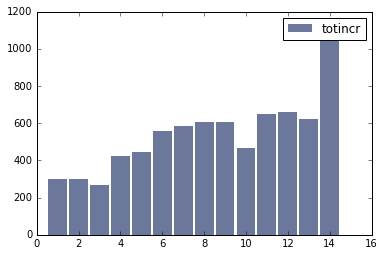

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

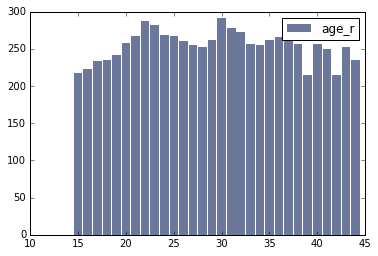

In [9]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

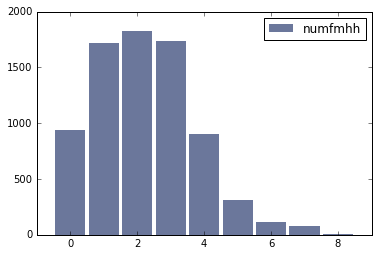

In [10]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

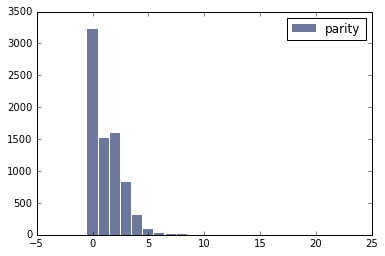

In [12]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist,label='parity')
thinkplot.Show()

I would describe the distribution as asymmetrical, with a tail to the right

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [13]:
hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

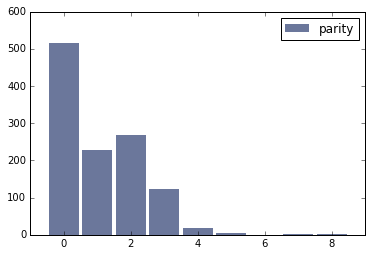

In [15]:
rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label = 'parity')
thinkplot.Show()

Find the largest parities for high income respondents.

In [16]:
hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [17]:
notrich = resp[resp.totincr < 14]
rich.parity.mean(), notrich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Investigate any other variables that look interesting.

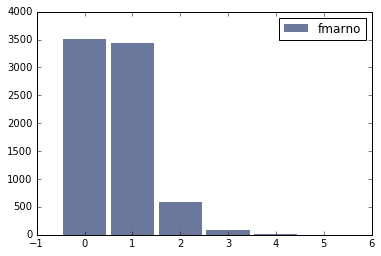

In [18]:
hist = thinkstats2.Hist(resp.fmarno)
thinkplot.Hist(hist, label='fmarno')
thinkplot.Show()

# Exercise 2.4

In [32]:
import nsfg, math
df = nsfg.ReadFemPreg()

In [33]:
first_babies = df[df.birthord == 1]
other_babies = df[df.birthord != 1]

In [35]:
first_babies_meanwgt = first_babies.totalwgt_lb.mean()
other_babies_meanwgt = other_babies.totalwgt_lb.mean()
first_babies_wgtvar = first_babies.totalwgt_lb.var()
other_babies_wgtvar = other_babies.totalwgt_lb.var()
len_first = len(first_babies.totalwgt_lb)
len_other = len(other_babies.totalwgt_lb)

pooled_var = (len_first * first_babies_wgtvar + len_other * other_babies_wgtvar) / (len_first + len_other)
d = (first_babies_meanwgt - other_babies_meanwgt) / math.sqrt(pooled_var)
print abs(d)

0.0889364117772


Just like for pregnancy length, the difference of 0.09 standard deviations is small, so there doesn't seem to be much of an effect size between first borns' weight and others' weight